## Temporal evolution of incidents

In [2]:
import numpy as np
import pandas as pd

**Arranging the data**

In [3]:
data_dir='/Users/belenmontenegro/Documents/Master/AVDM/AVDM_ioib/dades/'

data_csv = pd.read_csv(data_dir + "Dades_d_incidents_operatius_gestionats_pel_CAT112_20231110.csv")
# show loaded table:

data_csv

,ANY,MES,PROVINCIA,COMARCA,MUNICIPI,TIPUS,INCIDENTS
0,2023,10,BARCELONA,VALLES OCCIDENTAL,TERRASSA,Seguretat,1
1,2023,10,BARCELONA,Vallès Oriental,LLIÇA D'AMUNT,Accident,2
2,2023,10,GIRONA,Garrotxa,OLOT,Incendi,6
3,2023,10,TARRAGONA,Baix Camp,ALMOSTER,Incendi,1
4,2023,10,BARCELONA,Berguedà,CASTELLAR DEL RIU,Seguretat,2
...,...,...,...,...,...,...,...
507709,2014,1,GIRONA,ALT EMPORDA,CAPMANY,Seguretat,1
507710,2014,1,GIRONA,SELVA,VIDRERES,Incendi,4
507711,2014,1,GIRONA,PLA DE L'ESTANY,CRESPIA,Incendi,1
507712,2014,1,GIRONA,ALT EMPORDA,LLANÇA,Seguretat,13


In [4]:
data_csv.pop("PROVINCIA")
data_csv.pop("MUNICIPI")

0                  TERRASSA
1             LLIÇA D'AMUNT
2                      OLOT
3                  ALMOSTER
4         CASTELLAR DEL RIU
                ...        
507709              CAPMANY
507710             VIDRERES
507711              CRESPIA
507712               LLANÇA
507713             ROQUETES
Name: MUNICIPI, Length: 507714, dtype: object

In [6]:
data_csv=data_csv[(data_csv["ANY"] <= 2022) & (data_csv["ANY"] >= 2018)]

In [7]:
data_csv=data_csv.sort_index(axis=0, ascending=False)


,ANY,MES,COMARCA,TIPUS,INCIDENTS
315738,2018,1,BAGES,Trànsit,1
315737,2018,1,BAIX EBRE,Trànsit,10
315736,2018,1,GIRONES,Assistència sanitària,1
315735,2018,1,CONCA DE BARBERA,Trànsit,4
315734,2018,1,ALT CAMP,Medi ambient,2
...,...,...,...,...,...
50185,2022,12,CERDANYA,Assistència sanitària,2
50184,2022,12,VALLES ORIENTAL,Incendi,1
50183,2022,12,SELVA,Altres incidències,1
50182,2022,12,PLA D'URGELL,Incendi,1


In [98]:
data_csv['TIPUS'].unique()

array(['Trànsit', 'Assistència sanitària', 'Medi ambient', 'Seguretat',
       'Altres incidències', 'Incendi', 'Fuita (aigua, gas, altres)',
       'Accident', 'Meteorologia', 'Civisme'], dtype=object)

In [8]:
delete_values = ['Trànsit', 'Seguretat', 'Altres incidències','Medi ambient','Fuita (aigua, gas, altres)','Civisme']

data_csv=data_csv[~data_csv['TIPUS'].isin(delete_values)]

In [10]:
data_csv['DATE'] = pd.to_datetime(data_csv['ANY'].astype(str) + '-' + data_csv['MES'].astype(str),format='%Y-%m')

/var/folders/_b/6h88f4rs7jvb2bj2lh_dq8_h0000gn/T/ipykernel_50861/203127925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_csv['DATE'] = pd.to_datetime(data_csv['ANY'].astype(str) + '-' + data_csv['MES'].astype(str),format='%Y-%m')


**Seeing the general temporal evolution of the incidents**

In [14]:
data_expanded = data_csv.assign(INCIDENTS=data_csv['INCIDENTS'].astype(int)).explode('INCIDENTS')

In [15]:

data_expanded = data_csv.loc[data_csv.index.repeat(data_csv['INCIDENTS'].astype(int))].reset_index(drop=True)

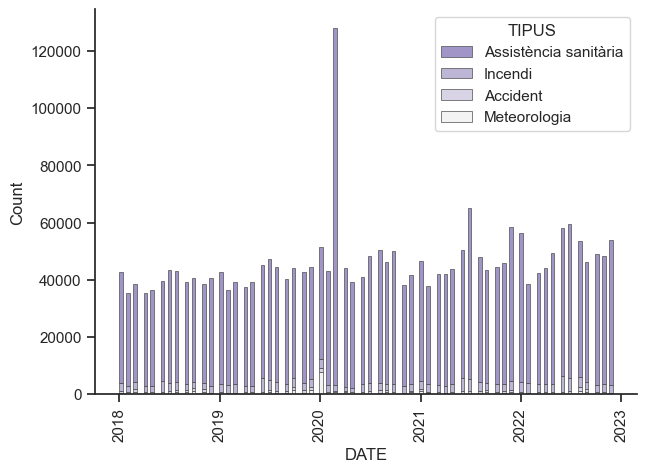

In [16]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    data_expanded,
    x="DATE", hue="TIPUS",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

plt.xticks(rotation=90)
#xticks_selected = ax.get_xticks()[::2]
#ax.set_xticks(xticks_selected)

plt.show()


**Studyin the possible correlation of the Fire Incidents at Barcelonès with the Pluvimetrics and the Temperature**

In [79]:
Incendios=data_csv[data_csv['TIPUS']=='Incendi']

A=pd.DataFrame(Incendios.groupby(["COMARCA"])['INCIDENTS'].sum())
A[A['INCIDENTS']==A.max()[0]]

/var/folders/_b/6h88f4rs7jvb2bj2lh_dq8_h0000gn/T/ipykernel_50861/1043885398.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  A[A['INCIDENTS']==A.max()[0]]


,INCIDENTS
COMARCA,
BARCELONES,38690


In [80]:
Inc_Barcelones=Incendios[Incendios['COMARCA']=='BARCELONES']

Inc_Barcelones=pd.DataFrame(Inc_Barcelones.groupby(["DATE"])['INCIDENTS'].sum())
Inc_Barcelones=Inc_Barcelones.reset_index()


In [81]:
pluvi_Barcelones=pd.read_csv('/Users/belenmontenegro/Documents/Master/AVDM/AVDM_ioib/dades/pluvi_Barcelones.csv',delimiter=';')
pluvi_Barcelones['DATE']=pd.to_datetime(pluvi_Barcelones['DATE'],format='%Y-%m')


In [82]:
df_corr=pd.merge(Inc_Barcelones, pluvi_Barcelones, on='DATE')

df_corr = df_corr.rename(columns={'INCIDENTS': 'Fire Incidents'})


In [83]:
df_corr['Pluvi (lag=1 month)'] = df_corr['Pluvi'].shift(1)
df_corr['Pluvi (lag=2 month)'] = df_corr['Pluvi'].shift(2)
df_corr['Pluvi (lag=3 month)'] = df_corr['Pluvi'].shift(3)
df_corr['Pluvi (lag=4 month)'] = df_corr['Pluvi'].shift(4)
df_corr['Pluvi (lag=5 month)'] = df_corr['Pluvi'].shift(5)


df_corr = df_corr.drop(range(5))

df_corr = df_corr.reset_index(drop=True)


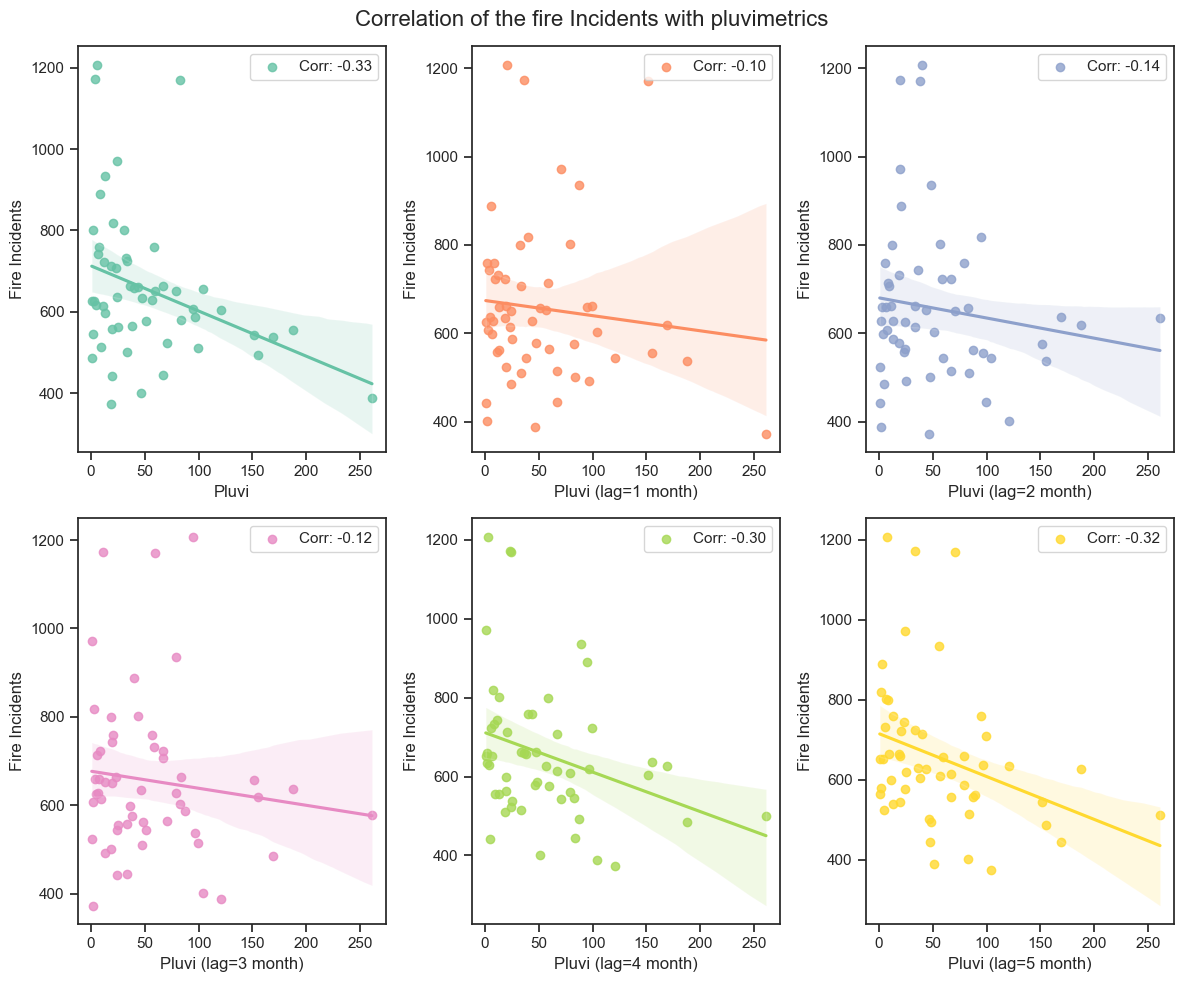

In [84]:
from scipy.stats import pearsonr
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 10))

palette = sns.color_palette("Set2")

# Función para agregar la leyenda con el coeficiente de correlación
def add_correlation_legend(x, y, ax):
    # Calcular el coeficiente de correlación
    corr_coef, _ = pearsonr(x, y)
    
    # Agregar la leyenda con el coeficiente de correlación
    legend_label = f'Corr: {corr_coef:.2f}'
    ax.legend([legend_label])

# Utilizar la función regplot y agregar la leyenda con el coeficiente de correlación
sns.regplot(x="Pluvi", y="Fire Incidents", data=df_corr, ax=ax1, color=palette[0])
add_correlation_legend(df_corr["Pluvi"], df_corr["Fire Incidents"], ax1)

sns.regplot(x="Pluvi (lag=1 month)", y="Fire Incidents", data=df_corr, ax=ax2, color=palette[1])
add_correlation_legend(df_corr["Pluvi (lag=1 month)"], df_corr["Fire Incidents"], ax2)

sns.regplot(x="Pluvi (lag=2 month)", y="Fire Incidents", data=df_corr, ax=ax3, color=palette[2])
add_correlation_legend(df_corr["Pluvi (lag=2 month)"], df_corr["Fire Incidents"], ax3)

sns.regplot(x="Pluvi (lag=3 month)", y="Fire Incidents", data=df_corr, ax=ax4, color=palette[3])
add_correlation_legend(df_corr["Pluvi (lag=3 month)"], df_corr["Fire Incidents"], ax4)

sns.regplot(x="Pluvi (lag=4 month)", y="Fire Incidents", data=df_corr, ax=ax5, color=palette[4])
add_correlation_legend(df_corr["Pluvi (lag=4 month)"], df_corr["Fire Incidents"], ax5)

sns.regplot(x="Pluvi (lag=5 month)", y="Fire Incidents", data=df_corr, ax=ax6, color=palette[5])
add_correlation_legend(df_corr["Pluvi (lag=5 month)"], df_corr["Fire Incidents"], ax6)

# Show the plots
plt.suptitle('Correlation of the fire Incidents with pluvimetrics', fontsize=16)
plt.tight_layout()
plt.show()

In [89]:
T_Barcelones=pd.read_csv('/Users/belenmontenegro/Documents/Master/AVDM/AVDM_ioib/dades/Temp_Barcelones.csv',delimiter=';')
T_Barcelones['DATE']=pd.to_datetime(T_Barcelones['DATE'],format='%Y-%m')

df_corr=pd.merge(Inc_Barcelones, T_Barcelones, on='DATE')

df_corr = df_corr.rename(columns={'INCIDENTS': 'Fire Incidents'})

df_corr['Temp (lag=1 month)'] = df_corr['Temp'].shift(1)
df_corr['Temp (lag=2 month)'] = df_corr['Temp'].shift(2)
df_corr['Temp (lag=3 month)'] = df_corr['Temp'].shift(3)
df_corr['Temp (lag=4 month)'] = df_corr['Temp'].shift(4)
df_corr['Temp (lag=5 month)'] = df_corr['Temp'].shift(5)


df_corr = df_corr.drop(range(5))

df_corr = df_corr.reset_index(drop=True)


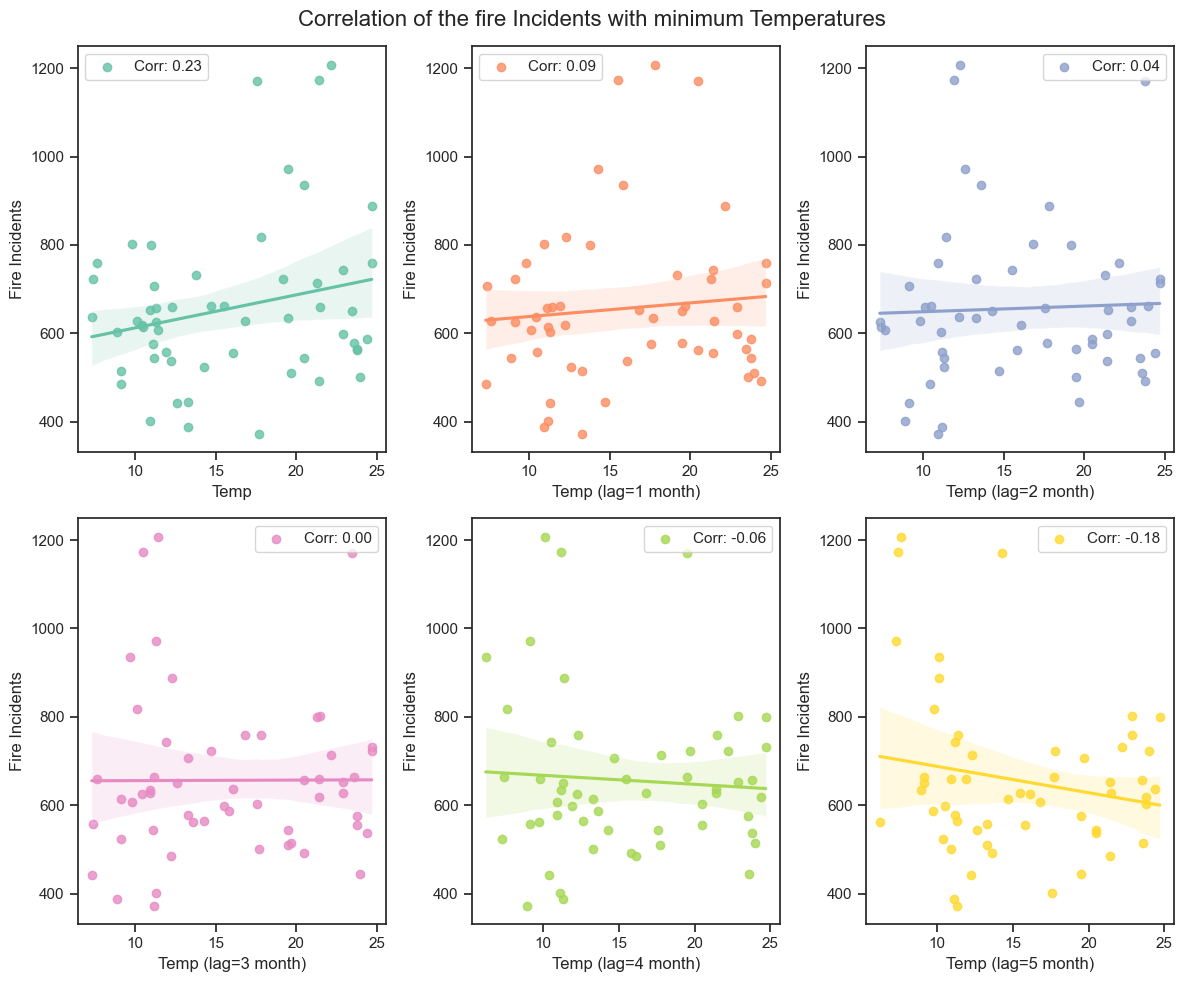

In [91]:
from scipy.stats import pearsonr
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 10))

palette = sns.color_palette("Set2")

# Función para agregar la leyenda con el coeficiente de correlación
def add_correlation_legend(x, y, ax):
    # Calcular el coeficiente de correlación
    corr_coef, _ = pearsonr(x, y)
    
    # Agregar la leyenda con el coeficiente de correlación
    legend_label = f'Corr: {corr_coef:.2f}'
    ax.legend([legend_label])

# Utilizar la función regplot y agregar la leyenda con el coeficiente de correlación
sns.regplot(x="Temp", y="Fire Incidents", data=df_corr, ax=ax1, color=palette[0])
add_correlation_legend(df_corr["Temp"], df_corr["Fire Incidents"], ax1)

sns.regplot(x="Temp (lag=1 month)", y="Fire Incidents", data=df_corr, ax=ax2, color=palette[1])
add_correlation_legend(df_corr["Temp (lag=1 month)"], df_corr["Fire Incidents"], ax2)

sns.regplot(x="Temp (lag=2 month)", y="Fire Incidents", data=df_corr, ax=ax3, color=palette[2])
add_correlation_legend(df_corr["Temp (lag=2 month)"], df_corr["Fire Incidents"], ax3)

sns.regplot(x="Temp (lag=3 month)", y="Fire Incidents", data=df_corr, ax=ax4, color=palette[3])
add_correlation_legend(df_corr["Temp (lag=3 month)"], df_corr["Fire Incidents"], ax4)

sns.regplot(x="Temp (lag=4 month)", y="Fire Incidents", data=df_corr, ax=ax5, color=palette[4])
add_correlation_legend(df_corr["Temp (lag=4 month)"], df_corr["Fire Incidents"], ax5)

sns.regplot(x="Temp (lag=5 month)", y="Fire Incidents", data=df_corr, ax=ax6, color=palette[5])
add_correlation_legend(df_corr["Temp (lag=5 month)"], df_corr["Fire Incidents"], ax6)

# Show the plots
plt.suptitle('Correlation of the fire Incidents with minimum Temperatures', fontsize=16)
plt.tight_layout()
plt.show()

In [85]:

Incendios_2018=Incendios[Incendios['ANY']==2018]
Incendios_2019=Incendios[Incendios['ANY']==2019]
Incendios_2020=Incendios[Incendios['ANY']==2020]
Incendios_2021=Incendios[Incendios['ANY']==2021]
Incendios_2022=Incendios[Incendios['ANY']==2022]

In [86]:
Incendios=pd.DataFrame(Incendios.groupby(["DATE"])['INCIDENTS'].sum())
Incendios=Incendios.reset_index()


In [87]:
Incendios_2018=pd.DataFrame(Incendios_2018.groupby(["MES"])['INCIDENTS'].sum())
Incendios_2019=pd.DataFrame(Incendios_2019.groupby(["MES"])['INCIDENTS'].sum())
Incendios_2020=pd.DataFrame(Incendios_2020.groupby(["MES"])['INCIDENTS'].sum())
Incendios_2021=pd.DataFrame(Incendios_2021.groupby(["MES"])['INCIDENTS'].sum())
Incendios_2022=pd.DataFrame(Incendios_2022.groupby(["MES"])['INCIDENTS'].sum())


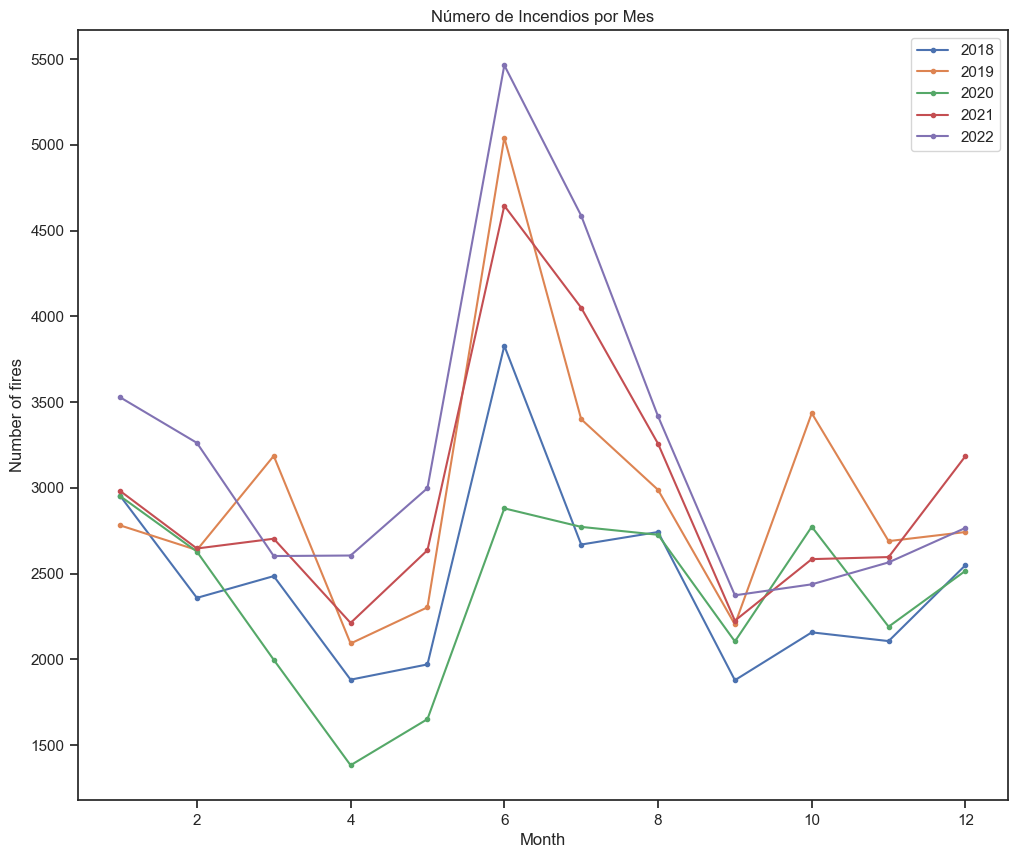

In [88]:
fig, ax = plt.subplots(figsize=(12, 10))

Incendios_2018.plot(kind='line', marker='.',ax=ax,legend=False)

Incendios_2019.plot(kind='line', marker='.',ax=ax,legend=False)

Incendios_2020.plot(kind='line', marker='.',ax=ax,legend=False)

Incendios_2021.plot(kind='line', marker='.',ax=ax,legend=False)

Incendios_2022.plot(kind='line', marker='.',ax=ax,legend=False)

ax.legend(['2018','2019','2020','2021','2022'])
plt.title('Número de Incendios por Mes')
plt.xlabel('Month')
plt.ylabel('Number of fires')
plt.show()

**Studying the variability with the seasons**

In [142]:

data_autumn=data_csv[(data_csv["MES"] <= 11) & (data_csv["MES"] >= 9)]
data_spring=data_csv[(data_csv["MES"] <= 5) & (data_csv["MES"] >= 3)]
data_summer=data_csv[(data_csv["MES"] <= 8) & (data_csv["MES"] >= 6)]
data_winter=data_csv[(data_csv["MES"] <= 12) & (data_csv["MES"] >= 2)]

In [143]:
data_autumn=pd.DataFrame(data_autumn.groupby('TIPUS')['INCIDENTS'].sum()).reset_index()

data_spring=pd.DataFrame(data_spring.groupby('TIPUS')['INCIDENTS'].sum()).reset_index()

data_summer=pd.DataFrame(data_summer.groupby('TIPUS')['INCIDENTS'].sum()).reset_index()

data_winter=pd.DataFrame(data_winter.groupby('TIPUS')['INCIDENTS'].sum()).reset_index()


In [149]:
data_autumn.loc[1,'TIPUS']='Medical Assistance' ; data_winter.loc[1,'TIPUS']='Medical Assistance' ; data_spring.loc[1,'TIPUS']='Medical Assistance' ; data_summer.loc[1,'TIPUS']='Medical Assistance'

data_autumn.loc[2,'TIPUS']='Fire' ;  data_winter.loc[2,'TIPUS']='Fire' ; data_spring.loc[2,'TIPUS']='Fire' ; data_summer.loc[2,'TIPUS']='Fire'

data_autumn.loc[3,'TIPUS']='Meteorology' ; data_winter.loc[3,'TIPUS']='Meteorology' ; data_spring.loc[3,'TIPUS']='Meteorology' ; data_summer.loc[3,'TIPUS']='Meteorology' 

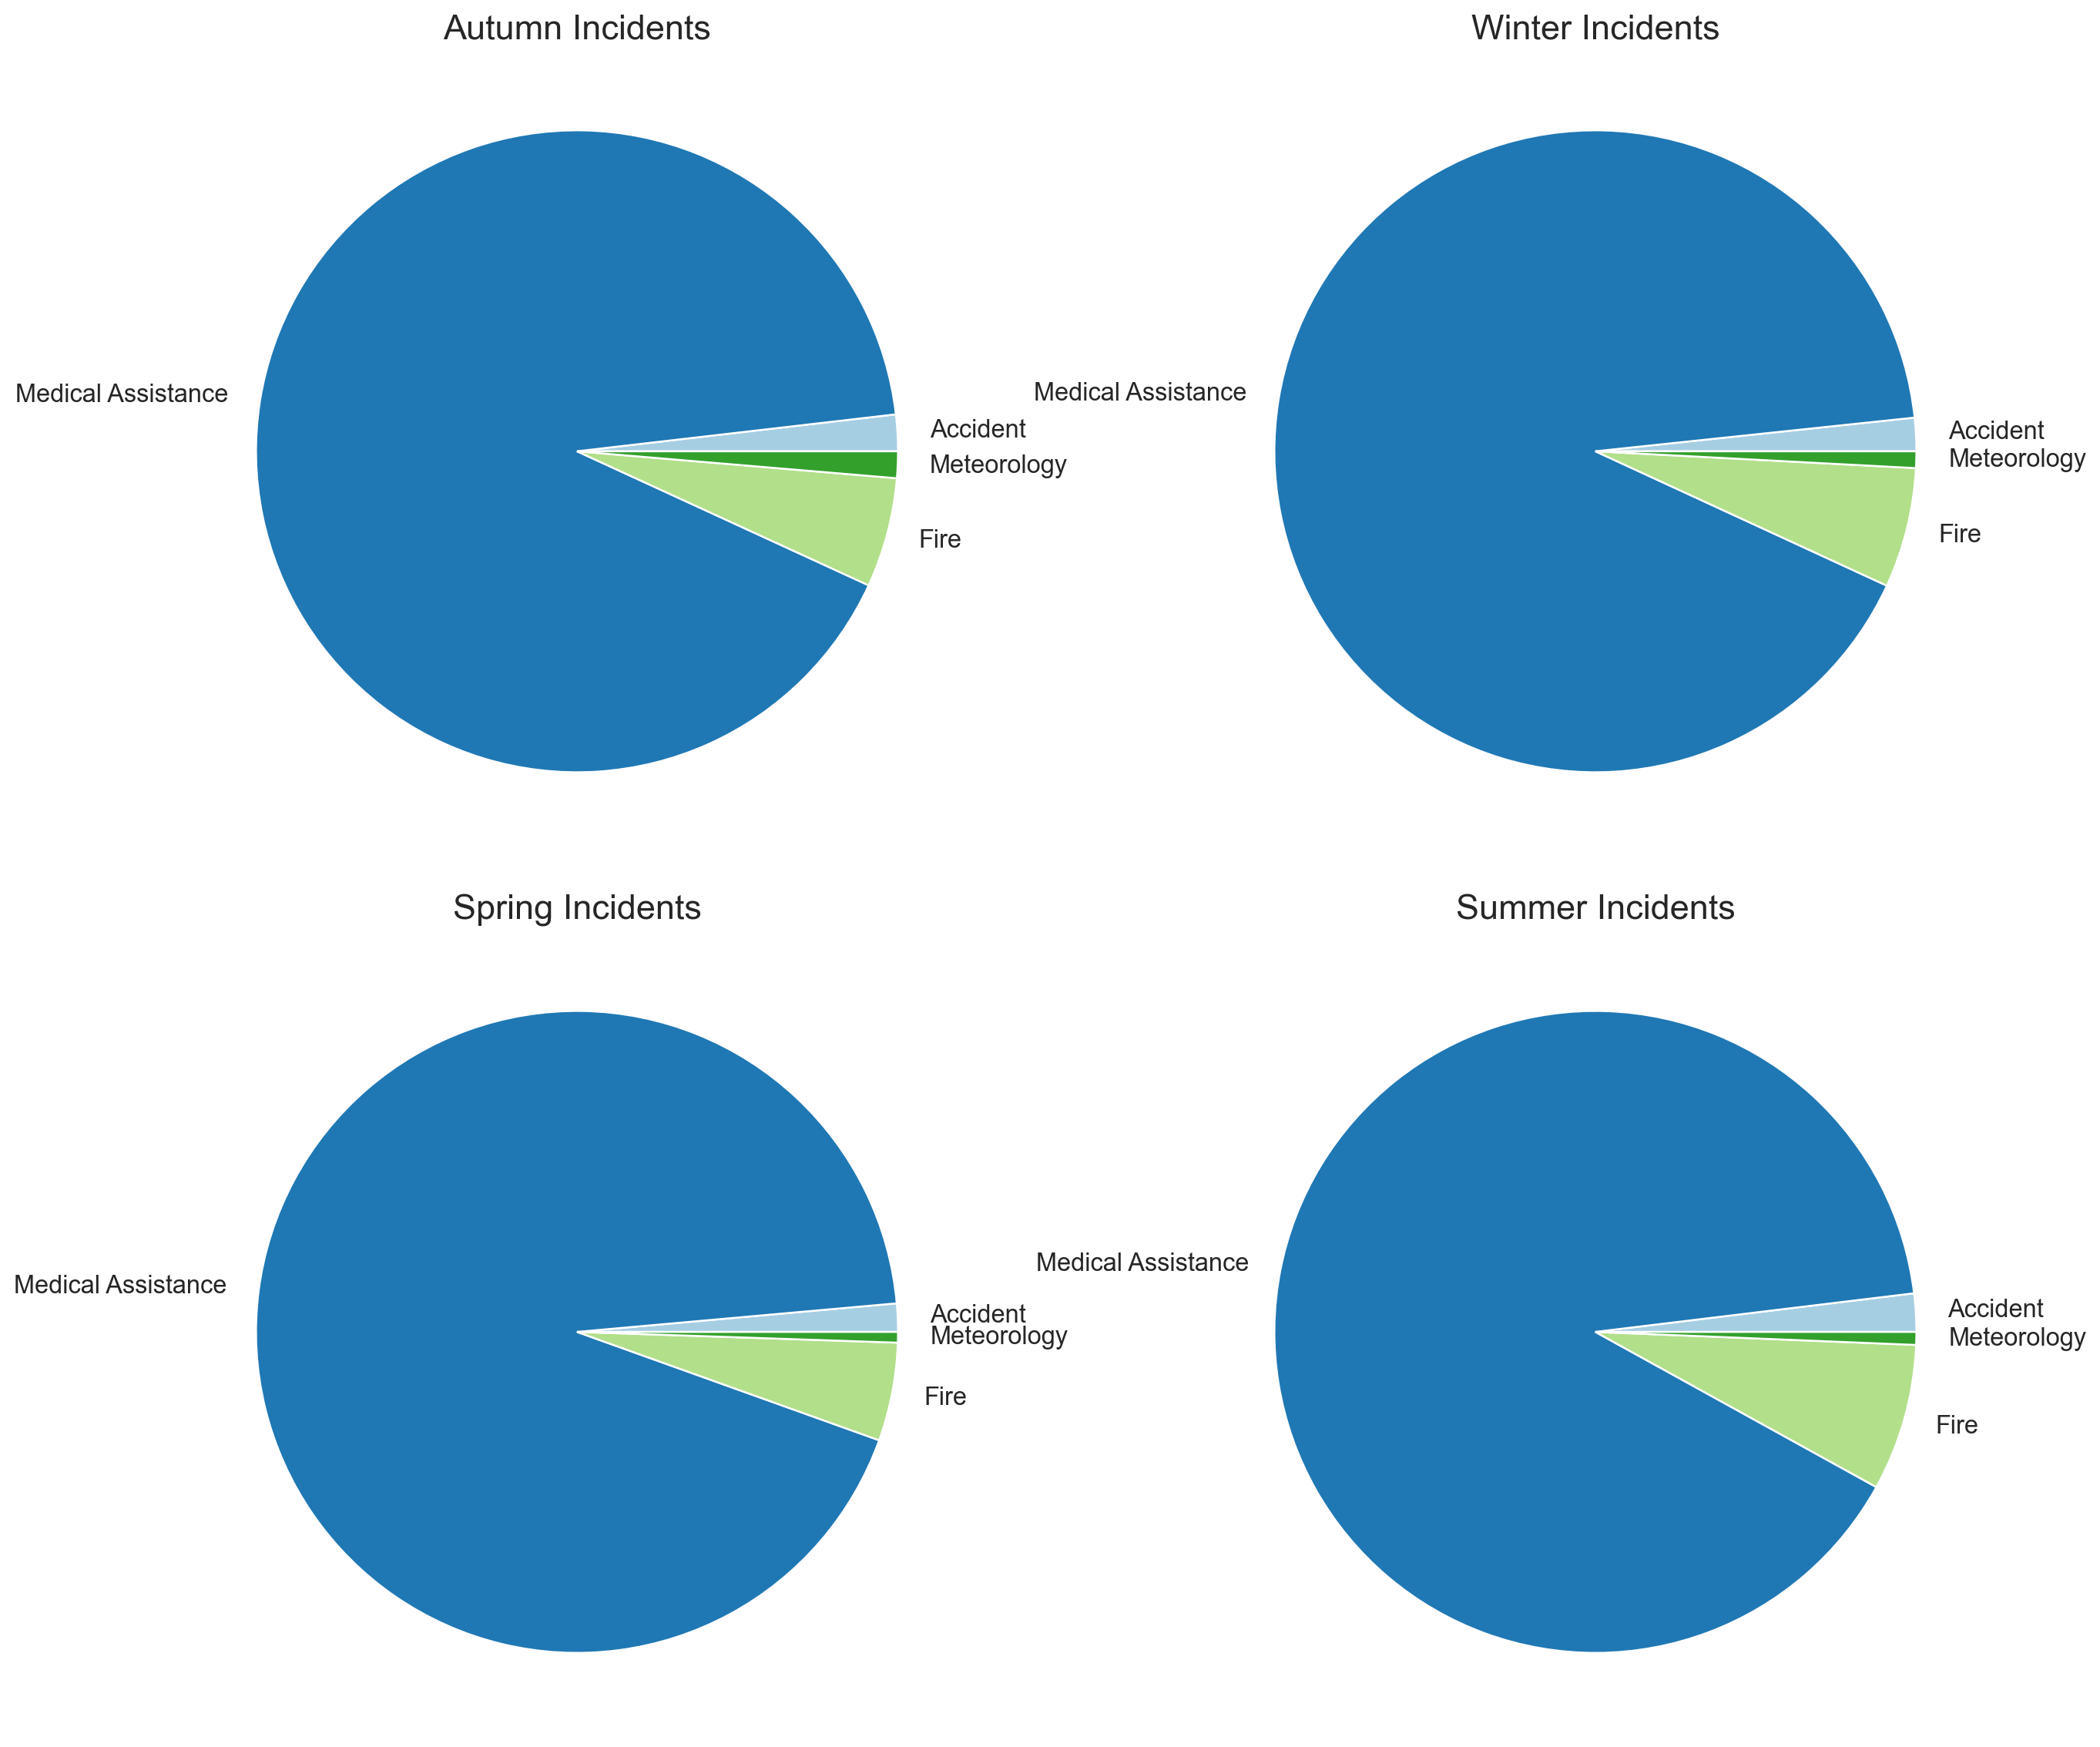

In [160]:
plt.figure(figsize=(15,13),dpi=180)


plt.subplot(2,2,1)

plt.title('Autumn Incidents',size=18)


plt.pie(data_autumn['INCIDENTS'],labels=data_autumn['TIPUS'],colors=plt.cm.Paired.colors, textprops={'fontsize': 13})

plt.subplot(2,2,2)

plt.title('Winter Incidents',size=18)

plt.pie(data_winter['INCIDENTS'],labels=data_winter['TIPUS'],colors=plt.cm.Paired.colors, textprops={'fontsize': 13})

plt.subplot(2,2,3)

plt.title('Spring Incidents',size=18)

plt.pie(data_spring['INCIDENTS'],labels=data_spring['TIPUS'],colors=plt.cm.Paired.colors, textprops={'fontsize': 13})

plt.subplot(2,2,4)

plt.title('Summer Incidents',size=18)

plt.pie(data_summer['INCIDENTS'],labels=data_summer['TIPUS'],colors=plt.cm.Paired.colors, textprops={'fontsize': 13})

plt.tight_layout()